In [6]:
#libraries and packages needed:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## timings analysis:

In [7]:
#report vs presentantion:
mpl.rc('font', family = 'serif')
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble = r'\usepackage{amsmath}')
mpl.rcParams['figure.figsize'] = [10, 10]

what = 'report' #'presentation'

if what == 'presentation' :
    
    mpl.rcParams['font.size'] = 24
    mpl.rc('xtick', labelsize = 18) 
    mpl.rc('ytick', labelsize = 18)
    cbar_length = 0.6
    
    file = 'timings_presentation.csv'
    
    # levels of theory:
    lots_labels = ['B97-1', 'B3LYP', r'$\omega$B97X-D', 'M06-2X', 'B2PLYP']

    # basis sets:
    bss_labels = ['6-31G*', 'pcseg-1', 'aug-pcseg-1', 'def2-SVPD', 'cc-pVDZ', 'pcseg-2', 'aug-pcseg-2', 'def2-TZVPD', 'cc-pVTZ']
    
elif what == 'report' :
    
    mpl.rcParams['font.size'] = 16
    mpl.rc('xtick', labelsize = 14) 
    mpl.rc('ytick', labelsize = 14)
    cbar_length = 0.4
    
    file = 'timings_report.csv'
    
    # levels of theory:
    lots_labels = ['B3LYP', 'B97-1', 'PBE0', 'TPSSh', 'M06-2X', r'$\omega$B97X-D', 'B2PLYP', 'B2PLYP-D']

    # basis sets:
    bss_labels = ['6-31G*', '6-31G**', 'pc-1', 'pcseg-1', 'def2-SVP', 'cc-pVDZ', 'aug-pcseg-1', 'def2-SVPD', 'aug-cc-pVDZ', 'pc-2', 'pcseg-2', 'def2-TZVPD', 'cc-pVTZ', 'aug-pcseg-2']

In [8]:
#general variables:
general_directory = '\\Users\\natia\\OneDrive\\Pulpit\\benchmark paper'

#reading in all timings data:
timings = pd.read_csv(f'{general_directory}\\{file}')
timings = timings['Timing in kSU'].values

timings_log = np.where(timings != -1, np.log(timings), timings) #make all values log scale and round to full integers

print(timings)
print(timings_log)

[ 0.1481  0.1809  0.1719  0.2771  0.2848  0.2064  0.4417  0.5283  0.1969
  0.2239  0.2112  0.3172  0.3584  0.2522  0.6268  0.6098  0.1927  0.2271
  0.2054  0.3543  0.3122  0.2389  0.6251  0.6309  0.1837  0.22    0.202
  0.3503  0.3557  0.2424  0.6157  0.5963  0.2079  0.2019  0.2225  0.3518
  0.2461  0.2421 -1.     -1.      0.2009  0.2176  0.2071  0.3801  0.4005
  0.2751  0.7234  0.6503  0.5755  0.5715  0.5809  0.8689  1.031   0.7288
  2.1053  2.2317  0.4396  0.4748  0.4433  0.7321  0.812   0.5465  1.6481
  1.6497  0.6137  0.6191  0.6611  0.9932  1.0623  0.6783 -1.     -1.
  1.1633  1.1995  1.0923  1.6537  1.289   1.6262  5.5401  5.5286  1.1614
  1.1589  1.1642  1.4347  1.4489  1.4437  5.4032  5.4939  1.3427  1.37
  1.3732  1.9791  2.2025  1.8203  6.4888  6.6038  1.3922  1.1419  1.1987
  1.7998  1.7375  1.4968  5.5139  5.4671  3.7495  4.4672  4.3697  5.3743
  4.7547  5.5811 -1.     -1.    ]
[-1.90986756 -1.70981089 -1.76084237 -1.28337683 -1.2559681  -1.57793925
 -0.81712436 -0.63809097

C:\Users\natia\AppData\Local\Temp\ipykernel_18588\1525024192.py:8: RuntimeWarning: invalid value encountered in log
  timings_log = np.where(timings != -1, np.log(timings), timings) #make all values log scale and round to full integers


In [9]:
#masking dh not done with specific bs:
timings_mask = np.array([], dtype = bool)

for t in timings_log : 
    
    if t == -1 :
        
        timings_mask = np.append(timings_mask, True)
    
    else :
        
        timings_mask = np.append(timings_mask, False)
        
print(timings_mask)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True]


# timings heatmap:

In [10]:
timings_log = timings_log.reshape(len(bss_labels), len(lots_labels)).T #reshape data into heatmap shape (.T to get x = bss and y = lot)
timings_mask = timings_mask.reshape(len(bss_labels), len(lots_labels)).T #reshape making data into heatmap shape (.T to get x = bss and y = lot)

#function to plot timings as heatmap:
def plot_heatmap(colour_scheme, c) :
    
    fig, ax = plt.subplots()
    palette = sns.color_palette(colour_scheme, as_cmap = True)

    timings_heatmap = sns.heatmap(timings_log, mask = timings_mask,
                                  vmin = np.min(timings_log), vmax = np.max(timings_log), center = c,
                                  linewidths = 0.5, linecolor = 'white',
                                  cbar = True, cbar_kws = {'label' : r'\textbf{Calculation time}', 'shrink' : cbar_length, 'extend': 'max'},
                                  square = True, ax = ax,
                                  xticklabels = bss_labels,
                                  yticklabels = lots_labels,
                                  cmap = palette)

    plt.ylabel(r'\textbf{Method}')
    plt.xlabel(r'\textbf{Basis Set}')

    cbar = timings_heatmap.collections[0].colorbar
    cbar.set_ticks([]) #hide x ticks
    cbar.set_ticklabels([]) #hide y ticks

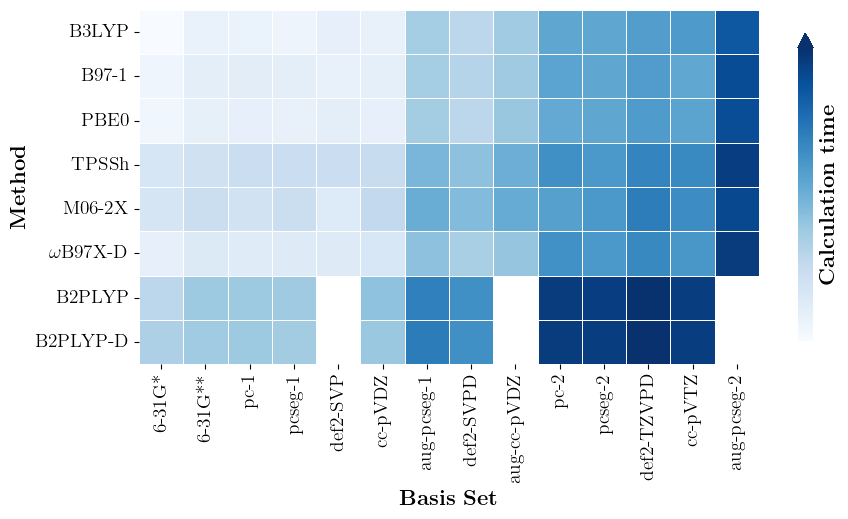

In [11]:
plot_heatmap('Blues', 0)

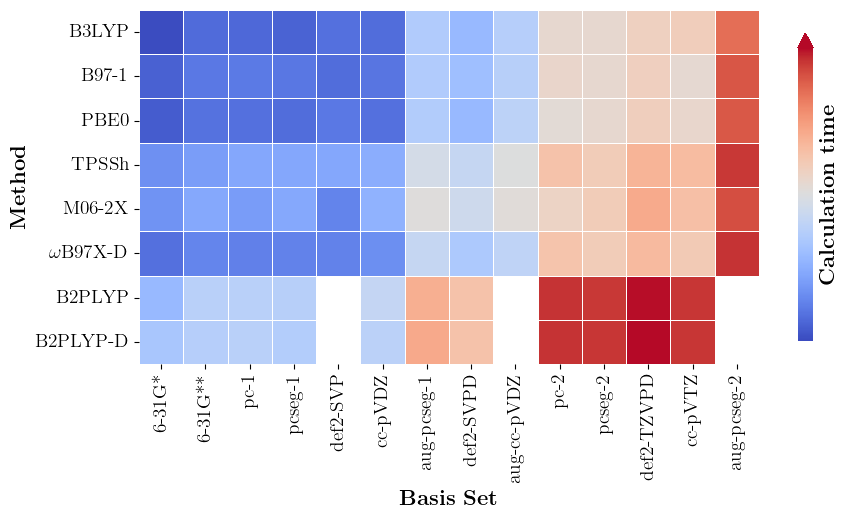

In [12]:
plot_heatmap('coolwarm', 0)

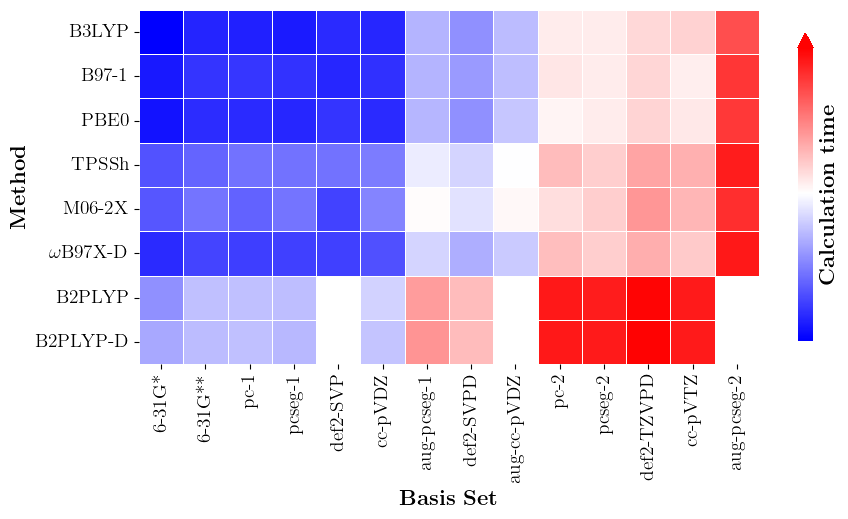

In [13]:
plot_heatmap('bwr', 0)

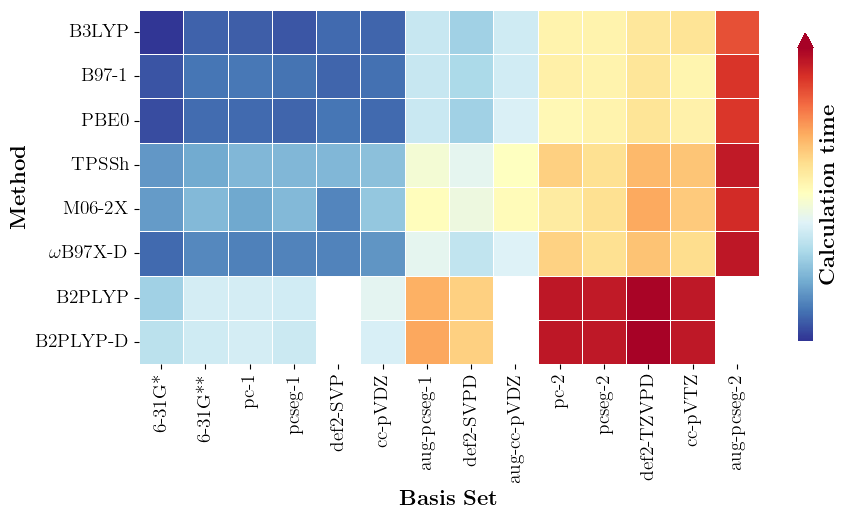

In [14]:
plot_heatmap('RdYlBu_r', 0)

# timings bubble plot:

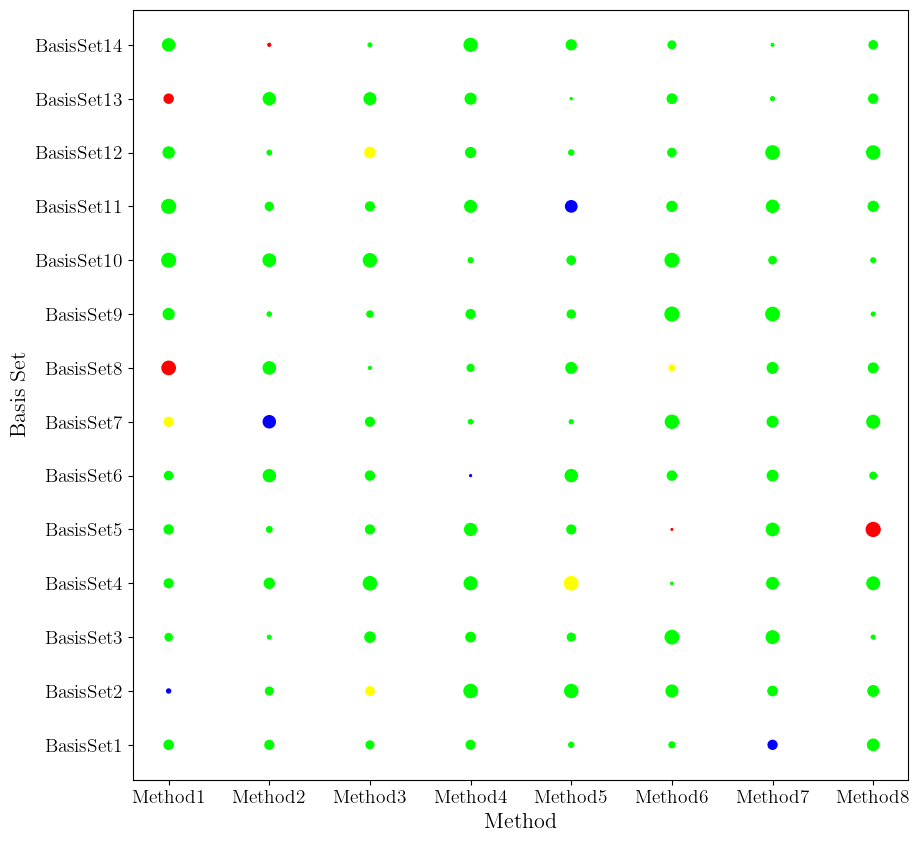

In [15]:
#sample data (to be replaced with actual data):
timings = np.random.rand(14, 8)
lots_labels = ['Method1', 'Method2', 'Method3', 'Method4', 'Method5', 'Method6', 'Method7', 'Method8']
bss_labels = ['BasisSet1', 'BasisSet2', 'BasisSet3', 'BasisSet4', 'BasisSet5', 'BasisSet6', 'BasisSet7', 'BasisSet8', 'BasisSet9', 'BasisSet10', 'BasisSet11', 'BasisSet12', 'BasisSet13', 'BasisSet14']

fig, ax = plt.subplots(figsize = (10, 10))
x_coords, y_coords = np.meshgrid(np.arange(len(lots_labels)), np.arange(len(bss_labels))) #create meshgrid for x and y coordinates

timings_flat = timings.flatten() #flatten timings array (make it 1D)
bubble_sizes = timings_flat * 100

num_bubbles = len(timings_flat) #generate colours for each bubble
colors = np.zeros((num_bubbles, 3)) #initialize an array to store bubble colors

#assign random colors to a few points:
red_indices = np.random.choice(num_bubbles, size = 5, replace = False)
blue_indices = np.random.choice([idx for idx in range(num_bubbles) if idx not in red_indices], size = 5, replace = False)
yellow_indices = np.random.choice([idx for idx in range(num_bubbles) if idx not in red_indices and idx not in blue_indices], size = 5, replace = False)
green_indices = [idx for idx in range(num_bubbles) if idx not in red_indices and idx not in blue_indices and idx not in yellow_indices]

colors[red_indices] = [1, 0, 0]  #red
colors[blue_indices] = [0, 0, 1]  #blue
colors[yellow_indices] = [1, 1, 0]  #yellow
colors[green_indices] = [0, 1, 0]  #green

bubble_plot = ax.scatter(x_coords.flatten(), y_coords.flatten(), s = bubble_sizes, c = colors)

ax.set_xlabel('Method', fontsize = 16)
ax.set_ylabel('Basis Set', fontsize = 16)
ax.set_xticks(np.arange(len(lots_labels)))
ax.set_yticks(np.arange(len(bss_labels)))
ax.set_xticklabels(lots_labels, fontsize = 14)
ax.set_yticklabels(bss_labels, fontsize = 14)

plt.show()
